We will be using Principal Component Analysis (PCA) to further reduce the dimensions (number of variables) of the dataset. We are aware that there is a shortcut to do this using the scikit-learn library, but we will be showing the complete method so that we can flex on what we researched and hopefully we can get some more marks :)

First, we are going to import all the necessary libraries.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [15]:
# read in final_data from data_exploration.ipynb
%store -r final_data

In [17]:
#find the dimensions of final_data
print("Dimensions of final_data:", final_data.shape)
print("Column titles in final_data:")
n=0
for col in final_data:
    print(col)
    n+=1
print("\n")
print("There are a total of", n, "columns.")

Dimensions of final_data: (191, 17)
Column titles in final_data:
GDP per capita (current US$)
Economy: Agriculture (% of GVA)
Agricultural production index (2004-2006=100)
International trade: Exports (million US$)
International trade: Imports (million US$)
Population growth rate (average annual %)
Urban population (% of total population)
Infant mortality rate (per 1000 live births
Mobile-cellular subscriptions (per 100 inhabitants)
Energy supply per capita (Gigajoules)
country
Region
Average labour force participation
Average life expectancy
Average pop. using improved drinking water
Average Education: Primary gross enrol
Health expenditure per capita


There are a total of 17 columns.


As can be seen, final_data has 191 entries (countries) and 17 columns. 

These 17 columns are made of country, region, and 15 metrics. We will be trying to reduce this 15 dimensions into a smaller number of dimensions (principal components, PC) without losing too much information (hopefully).

Let's begin!!!

Step 1: Data pre-processing. For this we will be doing a standard scaling of the data. This ensures that the data has a mean of 0 and a sd of 1. This is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (taken from scikit_learn).

In [18]:
#dropping the columns country and region
final_dropped = final_data.drop(labels=['country','Region'],axis=1)
final_dropped.head()

,GDP per capita (current US$),Economy: Agriculture (% of GVA),Agricultural production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol,Health expenditure per capita
0,623.2,23.3,125,1458.0,3568.0,3.2,26.7,68.6,61.6,5,51.450,62.250,62.60,111.35,51.1024
1,3984.2,22.4,134,1962.0,4669.0,-0.1,57.4,14.6,106.4,36,50.600,77.750,95.05,113.60,235.0678
2,4154.1,12.2,160,29992.0,47091.0,2.0,70.7,27.7,113.0,55,43.850,75.300,83.05,116.10,299.0952
4,39896.4,0.5,115,100.0,1355.0,-1.6,85.1,18.0,88.1,119,63.625,72.725,100.00,102.80,3231.6084
5,4714.1,6.8,175,21011.0,8790.0,3.5,44.1,65.4,60.8,25,68.450,60.200,51.80,128.65,155.5653


In [22]:
#importing necessary libraries for standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#computing the mean and sd
scaler.fit(final_dropped)

#perform standardisation by centering and scaling
final_scaled = scaler.transform(final_dropped)

#verification
final_scaled

array([[-0.57992492,  0.94172334,  0.27654231, ..., -2.09675955,
         0.55517885, -0.55373925],
       [-0.4362874 ,  0.86667536,  0.64193527, ...,  0.43398198,
         0.71267679, -0.45498555],
       [-0.42902646,  0.0161316 ,  1.69751491, ..., -0.50188546,
         0.8876745 , -0.42061526],
       ...,
       [-0.55927462,  0.22459821,  0.7231337 , ..., -2.35802255,
        -0.42830826, -0.54791169],
       [-0.55052645, -0.31741497,  2.46890004, ..., -1.64052417,
         0.01618591, -0.54598101],
       [-0.56850572,  0.08284092, -0.77903734, ..., -0.57207551,
        -0.24281069, -0.552493  ]])

Principal components (PC) are like new axes that retains the highest variance when the points are projected onto it.

PCA deals with eigen vectors and values. Eigenvectors are simply unit vectors in the direction of the PCs, and an eigenvalue is the sum of squared distances of projected points on the PC. Simply put, the higher the eigenvalue, the more the information is retained and thus the better the PC.

To derive the eigen vectors and values, we need the covariance matrix of the variables (against one another).

Step 2: Find covariance matrix. This can be done using the numpy covariance library.

In [24]:
#first transpose the dataset, then apply the covariance method
npcovmat = np.cov(final_scaled.T)
print(type(npcovmat))
print("numpy covariance matrix:\n", npcovmat)

<class 'numpy.ndarray'>
numpy covariance matrix:
 [[ 1.00526316 -0.43020619 -0.1727339   0.22747494  0.24377812 -0.12524221
   0.42589456 -0.41825748  0.26500529  0.46388961 -0.07334951  0.49776068
   0.35132856 -0.01562194  0.90126474]
 [-0.43020619  1.00526316  0.30217148 -0.22046177 -0.2184778   0.28735885
  -0.5658535   0.69453824 -0.53032884 -0.41891468  0.25557201 -0.64505173
  -0.54612248 -0.07033553 -0.4281149 ]
 [-0.1727339   0.30217148  1.00526316 -0.05315576 -0.05874764  0.33624092
  -0.0591598   0.3163706  -0.07743012 -0.0252275   0.26659572 -0.27878253
  -0.32541171  0.16402864 -0.2258491 ]
 [ 0.22747494 -0.22046177 -0.05315576  1.00526316  0.9507489  -0.17201619
   0.23887614 -0.25879488  0.11275678  0.19432195 -0.03281438  0.29947743
   0.20587295  0.0090612   0.38235807]
 [ 0.24377812 -0.2184778  -0.05874764  0.9507489   1.00526316 -0.16424594
   0.2390983  -0.25223231  0.10625284  0.20099655 -0.04651814  0.29702681
   0.20665229  0.00912645  0.4437567 ]
 [-0.12524221  

Step 3: Now that we have the covariance matrix, we can perform an eigendecomposition on the covariance matrix to get our eigenvectors and values. This can be done using the numpy.linalg.eig method.

In [26]:
#this handy method returns eigen values and vectors
eigvals,eigvecs = np.linalg.eig(npcovmat)
print("Eigenvectors:\n", eigvecs)
print("\n")
print("Eigenvalues:\n", eigvals)

Eigenvectors:
 [[-2.73434352e-01 -1.96314383e-01 -2.06617817e-01 -4.65051157e-01
  -2.47361018e-01 -2.24832690e-01  1.07245495e-01 -5.96238236e-01
  -3.21788699e-01  4.08833406e-02  7.57747446e-02  9.26545689e-03
  -1.89294115e-01  4.25490418e-02  1.73843840e-02]
 [ 3.21434261e-01 -1.21199439e-01  8.89658377e-02 -4.07417832e-02
  -7.56498604e-02  2.38600480e-02  2.32132291e-01 -5.49400315e-02
   1.41462005e-02  6.85412729e-02 -2.04042514e-01  4.56897518e-01
  -2.02559817e-01 -6.41907522e-01 -3.17580590e-01]
 [ 1.46627878e-01 -2.07423649e-01 -4.01210803e-01  3.12908254e-01
   1.02058100e-01  6.45869948e-02  7.17358928e-01  3.19181572e-02
   2.69978943e-02  1.58613784e-02  8.04100057e-02  6.21445646e-02
  -1.60185645e-01  3.24858078e-01  6.23191674e-02]
 [-1.86346197e-01 -5.40029450e-01  2.79966861e-01  2.60472273e-01
   1.26517290e-01  2.87508915e-02 -9.60092630e-02 -4.05489356e-01
   5.05347831e-01 -2.85091750e-01  3.44519750e-04  2.32062346e-03
  -1.24271046e-02  7.47582816e-03 -8.593

Step 4: Deciding which PCs (eigenvectors) can be dropped and which to keep. The higher the eigenvalue, the more we should keep that eigenvector.

As for how many PCs we should keep, this depends on the explained variance, which tells us how much information each PC retains. This can be calculated for each PC by taking the eigenvalue of that PC divided by the sum total of eigenvalues.

In [27]:
#creating a list of eigenvalue, eigenvector tuple pairs
eigpairs = [(eigvals[i], eigvecs[:,i]) for i in range(len(eigvals))]

#it will help to sort the eigenvectors in descending order of eigenvalues
eigpairs.sort(key = lambda x: x[0], reverse = True)

#printing out the tuple pairs to check if they are sorted by eigenvalues (0th item)
print("Checking for descending order of eigenvalues:")
eigpairs

Checking for descending order of eigenvalues:


[(5.78261751725064,
  array([-0.27343435,  0.32143426,  0.14662788, -0.1863462 , -0.18982483,
          0.19591088, -0.29267881,  0.37090916, -0.25190013, -0.23703088,
          0.13787701, -0.37225353, -0.32330869, -0.01772527, -0.29321874])),
 (1.8747103134833092,
  array([-0.19631438, -0.12119944, -0.20742365, -0.54002945, -0.55127379,
         -0.19570064,  0.01639944, -0.18869968,  0.15395056, -0.10423064,
         -0.25771776,  0.11353194,  0.20523647,  0.00675913, -0.27927853])),
 (1.5438320629602396,
  array([-0.20661782,  0.08896584, -0.4012108 ,  0.27996686,  0.27572009,
         -0.45760156, -0.20692709, -0.04205716, -0.30205421, -0.38655338,
         -0.25203535,  0.02393755,  0.08119531, -0.25243681, -0.07044229])),
 (1.251619093826127,
  array([-0.46505116, -0.04074178,  0.31290825,  0.26047227,  0.22942092,
         -0.0603806 ,  0.03926854, -0.12414528,  0.25421138, -0.11280108,
         -0.00541694,  0.06340335,  0.13163013,  0.53837011, -0.39307836])),
 (0.96130862032

In [28]:
#calculating explained variance of the PCs
explained_vars = []
eigvals_total = sum(eigvals)

#creating a np array of explained variance (cumulative) of the PCs
x=0
for i in eigpairs:
    x+=i[0]/eigvals_total*100
    explained_vars.append(x)
explained_vars = np.array(explained_vars)
print("Explained variance (cumulative):")
for i in explained_vars:
    print(i)

Explained variance (cumulative):
38.34894688578087
50.78158072738048
61.01990854456881
69.32034930641747
75.69551991239787
81.08415395520953
85.7383977419577
89.10121040603808
92.1388549804189
94.73042081749931
97.09743714987063
98.77100623981082
99.39845201920951
99.762568288026
100.0


We can use a scree plot to visualise the explained variance of the PCs.

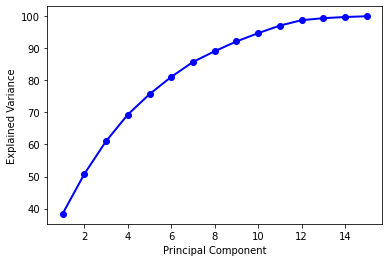

In [29]:
principalcomponents = np.arange(len(eigvals)) + 1
plt.plot(principalcomponents, explained_vars, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

From the explained variances list above and the scree plot, we can see that over 80% of the explained variance are from the first 6 PCs. Therefore we will be keeping these 6 PCs and dropping the 9 others.

Step 5: Creating a projection matrix using the first 6 PCs.

In [31]:
projmatrix = np.hstack((eigpairs[0][1].reshape(15,1),
                        eigpairs[1][1].reshape(15,1),
                        eigpairs[2][1].reshape(15,1),
                        eigpairs[3][1].reshape(15,1),
                        eigpairs[4][1].reshape(15,1),
                        eigpairs[5][1].reshape(15,1)))

print('projmatrix:\n', projmatrix)

projmatrix:
 [[-0.27343435 -0.19631438 -0.20661782 -0.46505116 -0.24736102 -0.22483269]
 [ 0.32143426 -0.12119944  0.08896584 -0.04074178 -0.07564986  0.02386005]
 [ 0.14662788 -0.20742365 -0.4012108   0.31290825  0.1020581   0.06458699]
 [-0.1863462  -0.54002945  0.27996686  0.26047227  0.12651729  0.02875089]
 [-0.18982483 -0.55127379  0.27572009  0.22942092  0.11395961 -0.00753361]
 [ 0.19591088 -0.19570064 -0.45760156 -0.0603806   0.2985856  -0.19068403]
 [-0.29267881  0.01639944 -0.20692709  0.03926854  0.33192376 -0.11239536]
 [ 0.37090916 -0.18869968 -0.04205716 -0.12414528  0.0519303  -0.15466653]
 [-0.25190013  0.15395056 -0.30205421  0.25421138  0.16803169  0.1130158 ]
 [-0.23703088 -0.10423064 -0.38655338 -0.11280108  0.19532001  0.24946899]
 [ 0.13787701 -0.25771776 -0.25203535 -0.00541694 -0.46966575  0.6821361 ]
 [-0.37225353  0.11353194  0.02393755  0.06340335 -0.06690387  0.05380888]
 [-0.32330869  0.20523647  0.08119531  0.13163013 -0.14966402  0.2106224 ]
 [-0.0177252

Step 6: Projecting the 191 countries onto the new projection matrix.

In [36]:
data6D = final_scaled.dot(projmatrix)
data6D

array([[ 3.47344817, -0.53731581,  0.07408069, -0.23508806,  0.51147498,
        -1.94100408],
       [-0.20245224,  1.18681172,  0.61041416,  1.07050743, -0.23438051,
        -0.59568395],
       [ 0.20460793,  0.44391053, -0.72801306,  1.33005198,  1.06115138,
        -1.6783524 ],
       ...,
       [ 2.70371875, -0.26293188,  0.19743945, -0.43257053,  1.21300032,
        -1.36773286],
       [ 3.09909365, -1.20792477, -1.51731857,  0.40881357,  0.22193358,
         0.19849308],
       [ 2.43272797, -0.36545741,  0.01881792, -0.51997277, -0.70122716,
         1.04238477]])

In [37]:
print(len(data6D))

191


data6D is now an array of 191 x 6 dimensional data.